In [ ]:
### This notebook generates a plot for one task each time, but the task to represent can be changed by
### changing a word in the code, as indicated below where it says "### SPECIFY HERE WHICH TASK TO REPRESENT"

In [ ]:
cd /files_for_calculating_gradients_group

In [2]:
import nibabel as nib
import nibabel.gifti
import nilearn
from nilearn import datasets, plotting
import sys
import pandas as pd
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import pylab as plt
from matplotlib.colors import ListedColormap
mpl.rcParams['svg.fonttype'] = 'none'
import sys
sys.path.append('gradient_data/src/')

/om/user/xaviergp/env/xavier_env/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [ ]:
### Create dscalar which has SUIT atlas only with this command:
### wb_command -cifti-create-dense-from-template tasks/cohendmapEMOTION_cerebellumonly.dscalar.nii SUITatlas.dscalar.nii -volume-all Cerebellum-MNIfnirt-maxprob-thr25.nii

In [11]:
LANG = nib.load('/tasks/cohendmapLANGUAGE_cerebellumonly.dscalar.nii').get_data()
WM = nib.load('/tasks/cohendmapWM_cerebellumonly.dscalar.nii').get_data()
MOTORRH = nib.load('/tasks/cohendmapMOTORRH_cerebellumonly.dscalar.nii').get_data()
MOTORLH = nib.load('/tasks/cohendmapMOTORLH_cerebellumonly.dscalar.nii').get_data()
MOTORRF = nib.load('/tasks/cohendmapMOTORRF_cerebellumonly.dscalar.nii').get_data()
MOTORLF = nib.load('/tasks/cohendmapMOTORLF_cerebellumonly.dscalar.nii').get_data()
MOTORT = nib.load('/tasks/cohendmapMOTORT_cerebellumonly.dscalar.nii').get_data()
EMOTION = nib.load('/tasks/cohendmapEMOTION_cerebellumonly.dscalar.nii').get_data()
SOCIAL = nib.load('/tasks/cohendmapSOCIAL_cerebellumonly.dscalar.nii').get_data()

res_colorLANG_v2 = res_colorLANG[0]
res_colorWM_v2 = res_colorWM[0]
res_colorMOTORRH_v2 = res_colorMOTORRH[0]
res_colorMOTORLH_v2 = res_colorMOTORLH[0]
res_colorMOTORRF_v2 = res_colorMOTORRF[0]
res_colorMOTORLF_v2 = res_colorMOTORLF[0]
res_colorMOTORT_v2 = res_colorMOTORT[0]
res_colorEMOTION_v2 = res_colorEMOTION[0]
res_colorSOCIAL_v2 = res_colorSOCIAL[0]

### Threshold at Cohen's d > 0.5
res_colorLANG_v2[res_colorLANG_v2 < 0.5] = 0
res_colorLANG_v2[res_colorLANG_v2 > 0.5] = 1
res_colorWM_v2[res_colorWM_v2 < 0.5] = 0
res_colorWM_v2[res_colorWM_v2 > 0.5] = 1
res_colorEMOTION_v2[res_colorEMOTION_v2 < 0.5] = 0
res_colorEMOTION_v2[res_colorEMOTION_v2 > 0.5] = 1
res_colorSOCIAL_v2[res_colorSOCIAL_v2 < 0.5] = 0
res_colorSOCIAL_v2[res_colorSOCIAL_v2 > 0.5] = 1
res_colorMOTORRH_v2[res_colorMOTORRH_v2 < 0.5] = 0
res_colorMOTORRH_v2[res_colorMOTORRH_v2 > 0.5] = 1
res_colorMOTORLH_v2[res_colorMOTORLH_v2 < 0.5] = 0
res_colorMOTORLH_v2[res_colorMOTORLH_v2 > 0.5] = 1
res_colorMOTORRF_v2[res_colorMOTORRF_v2 < 0.5] = 0
res_colorMOTORRF_v2[res_colorMOTORRF_v2 > 0.5] = 1
res_colorMOTORLF_v2[res_colorMOTORLF_v2 < 0.5] = 0
res_colorMOTORLF_v2[res_colorMOTORLF_v2 > 0.5] = 1
res_colorMOTORT_v2[res_colorMOTORT_v2 < 0.5] = 0
res_colorMOTORT_v2[res_colorMOTORT_v2 > 0.5] = 1
res_colorMOTORALL_v2 = (res_colorMOTORRH_v2 + res_colorMOTORLH_v2 + res_colorMOTORRF_v2 + res_colorMOTORLF_v2 + res_colorMOTORT_v2)

### Generate matrix of each area of representation with either 1 or 0
SUITatlas = nib.load('SUITatlas.dscalar.nii').get_data()
SUITatlas_FIRSTREP = SUITatlas <=10
SUITatlas_FIRSTREP = SUITatlas_FIRSTREP.astype(int)
SUITatlas_SECONDREP_preliminar1 = SUITatlas >10
SUITatlas_SECONDREP_preliminar1 = SUITatlas_SECONDREP_preliminar1.astype(int)
SUITatlas_SECONDREP_preliminar2 = SUITatlas <=22
SUITatlas_SECONDREP_preliminar2 = SUITatlas_SECONDREP_preliminar2.astype(int)
SUITatlas_SECONDREP = SUITatlas_SECONDREP_preliminar1 * SUITatlas_SECONDREP_preliminar2
SUITatlas_THIRDREP = SUITatlas >=23
SUITatlas_THIRDREP = SUITatlas_THIRDREP.astype(int)

### SPECIFY HERE WHICH TASK TO REPRESENT

#TASK_TO_PLOT = res_colorSOCIAL_v2
#FIRSTREPTEST = TASK_TO_PLOT * SUITatlas_FIRSTREP[0]
#SECONDREPTEST = TASK_TO_PLOT * SUITatlas_SECONDREP[0]
#THIRDREPTEST = TASK_TO_PLOT * SUITatlas_THIRDREP[0]

TASK_TO_PLOT = res_colorLANG_v2
FIRSTREPTEST = (TASK_TO_PLOT * SUITatlas_FIRSTREP[0]) + (TASK_TO_PLOT * SUITatlas_SECONDREP[0])
SECONDREPTEST = TASK_TO_PLOT * 0 
THIRDREPTEST = TASK_TO_PLOT * SUITatlas_THIRDREP[0]

#TASK_TO_PLOT = res_colorMOTORALL_v2
#FIRSTREPTEST = TASK_TO_PLOT * SUITatlas_FIRSTREP[0]
#THIRDREPTEST = TASK_TO_PLOT * SUITatlas_SECONDREP[0]
#SECONDREPTEST = TASK_TO_PLOT * 0

#TASK_TO_PLOT = res_colorWM_v2
#FIRSTREPTEST = TASK_TO_PLOT * SUITatlas_FIRSTREP[0]
#SECONDREPTEST = TASK_TO_PLOT * SUITatlas_SECONDREP[0]
#THIRDREPTEST = TASK_TO_PLOT * SUITatlas_THIRDREP[0]

#TASK_TO_PLOT = res_colorEMOTION_v2
#FIRSTREPTEST = TASK_TO_PLOT * SUITatlas_FIRSTREP[0]
#SECONDREPTEST = TASK_TO_PLOT * SUITatlas_SECONDREP[0]
#THIRDREPTEST = TASK_TO_PLOT * SUITatlas_THIRDREP[0]

In [12]:
res = nib.load('result_cerebellumonly.dscalar.nii').get_data()
res.shape = (8, 18142)
res_component1 = res[0]
res_component2 = res[1]
res_component3 = res[2]
res_component4 = res[3]
res_component5 = res[4]
res_component6 = res[5]
res_component7 = res[6]
res_component8 = res[7]

import seaborn as sns
sns.set(style="white")
sns.set_context("notebook", font_scale=1.5)

df = pd.DataFrame()
df['e0'] = np.array(res_component1)
df['e1'] = np.array(res_component2)
df['e2'] = np.array(res_component3)
df['e3'] = np.array(SECONDREPTEST)
df['e4'] = np.array(FIRSTREPTEST)
df['e5'] = np.array(THIRDREPTEST)
df['e6'] = np.array(res_component4)
df['e9'] = np.array(res_component5)
df['e10'] = np.array(res_component6)
df['e13'] = np.array(res_component7)
df['e14'] = np.array(res_component8)

import matplotlib.cm as cm

norm_1 = mpl.colors.Normalize(vmin=df['e3'].min(), vmax=df['e3'].max())
cmap_1 = cm.Reds
map_1 = cm.ScalarMappable(norm=norm_1, cmap=cmap_1)

norm_2 = mpl.colors.Normalize(vmin=df['e4'].min(), vmax=df['e4'].max())
cmap_2 = cm.Greens
map_2 = cm.ScalarMappable(norm=norm_2, cmap=cmap_2)

norm_3 = mpl.colors.Normalize(vmin=df['e5'].max() * -1, vmax=df['e5'].min() * -1)
cmap_3 = cm.Blues
map_3= cm.ScalarMappable(norm=norm_3, cmap=cmap_3)

c = np.ones(map_1.to_rgba(df['e3']).shape)

a = df['e4'].copy()
a = a - a.min() 
a = a / a.max()
c[:,1] = a

a = df['e3'].copy()
a = a - a.min() 
a = a / a.max()
c[:,2] = a

a = df['e5'].copy()
a = a - a.min() 
a = a / a.max()
c[:,0] = a

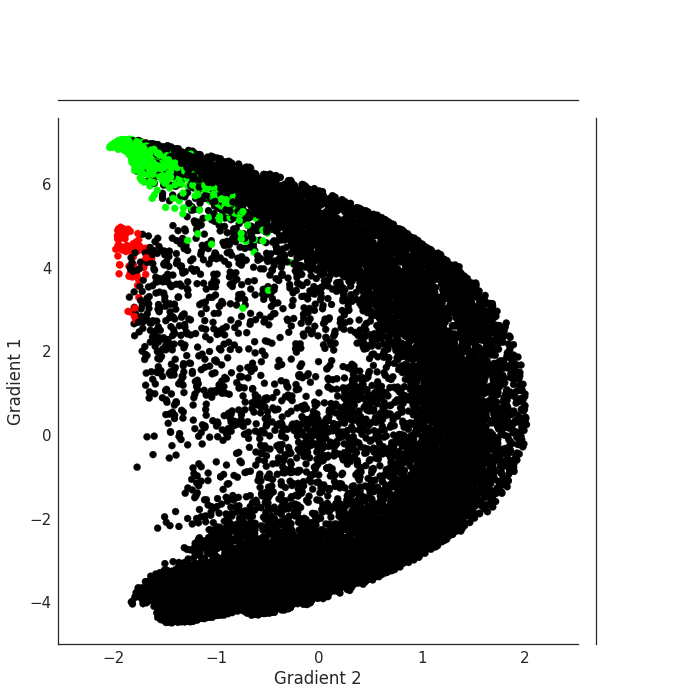

In [13]:
sns.set_context(font_scale=2)
sns.set_style("ticks", {"xtick.major.size": 0.001, "ytick.major.size": 0.001})
g = (sns.jointplot('e0', 'e1', 
                   data=df,
                   size=10, label='big', linewidth=0, marker='.', alpha=0, color='w', # alpha=0.8,
                   ylim = [np.min(df['e0']) - 0.5, np.max(df['e0']) + 0.5], 
                   xlim=[np.min(df['e1']) - 0.5, np.max(df['e1']) + 0.5], 
                   stat_func=None).set_axis_labels('Gradient 2', 'Gradient 1'))
g.ax_joint.scatter(df.e1, df.e0, c=c)
g.savefig(os.path.abspath('figure.png'), format='png', dpi=600, transparent=False)
plt.show()